In [1]:
import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('mutations.csv', error_bad_lines=False, names = ["Class", "Package", "gc1", "gc2","gc3","Coverage","gc4"])


In [4]:
df.drop('gc1', axis=1, inplace=True)


In [5]:
df.drop('gc2', axis=1, inplace=True)


In [6]:
df.drop('gc3', axis=1, inplace=True)


In [7]:
df.drop('gc4', axis=1, inplace=True)


In [8]:
df['Package'] = df['Package'].map(lambda x: str(x)[:x.rfind('.')])


In [9]:
df['Package'] = df['Package'].map(lambda x:  x if (x.find('$')+1 == 0) else  x[:x.find('$')+1] )


In [10]:
df['Class'] = df['Class'].map(lambda x: str(x)[:x.rfind('.java')])


In [11]:
df.rename(columns={'Class':'CLASS',
                          'Package':'PACKAGE'},
                 inplace=True)

In [12]:
df.head()


,CLASS,PACKAGE,Coverage
0,PropertyListParserTokenManager,org.apache.commons.configuration2.plist,NO_COVERAGE
1,PropertyListParserTokenManager,org.apache.commons.configuration2.plist,NO_COVERAGE
2,PropertyListParserTokenManager,org.apache.commons.configuration2.plist,NO_COVERAGE
3,PropertyListParserTokenManager,org.apache.commons.configuration2.plist,NO_COVERAGE
4,PropertyListParserTokenManager,org.apache.commons.configuration2.plist,NO_COVERAGE


In [13]:
df = df.groupby(['CLASS','PACKAGE','Coverage'],as_index = False).size().unstack(fill_value=0)


In [14]:
df['Total_Mutant'] =  (df['KILLED'] + df['NO_COVERAGE'] + df['SURVIVED'] + df['TIMED_OUT'])


In [15]:
df['Mutation_Score'] =  ((df['KILLED']+df['TIMED_OUT']) / df['Total_Mutant'])*100


In [16]:
df1 = pd.read_csv('jacoco.csv', error_bad_lines=False)


In [17]:
df1['CLASS'] = df1['CLASS'].map(lambda x:  x if (x.find('.')+1 == 0) else  x[:x.find('.')] )


In [18]:
df1 = df1.groupby(df1['CLASS']).aggregate(sum).reset_index()


In [19]:
df1.columns


Index(['CLASS', 'INSTRUCTION_MISSED', 'INSTRUCTION_COVERED', 'BRANCH_MISSED',
       'BRANCH_COVERED', 'LINE_MISSED', 'LINE_COVERED', 'COMPLEXITY_MISSED',
       'COMPLEXITY_COVERED', 'METHOD_MISSED', 'METHOD_COVERED',
       'Statement Coverage', 'Branch Coverage', 'Code Complexity'],
      dtype='object')

In [20]:
merged_inner = pd.merge(left=df,right=df1, left_on='CLASS', right_on='CLASS')


In [21]:
df1[(~df1.CLASS.isin(merged_inner.CLASS))&(~df1.CLASS.isin(merged_inner.CLASS))]


,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement Coverage,Branch Coverage,Code Complexity
38,ConfigurationException,0,16,0,0,0,8,0,4,0,4,100.0,0.0,4
51,ConfigurationRuntimeException,0,22,0,0,0,10,0,5,0,5,100.0,0.0,5
57,ConversionException,7,9,0,0,4,4,2,2,2,2,50.0,0.0,4
76,EnvironmentConfiguration,0,22,0,0,0,5,0,4,0,4,100.0,0.0,4
88,FileHandlerListenerAdapter,0,8,0,0,0,6,0,6,0,6,100.0,0.0,6
112,LockMode,5,33,0,0,0,3,1,3,1,3,100.0,0.0,4
122,NoOpSynchronizer,9,23,0,0,0,6,2,6,2,6,100.0,0.0,8
143,PropertyListParserConstants,0,124,0,0,0,1,0,1,0,1,100.0,0.0,1
175,VerifiableOutputStream,0,3,0,0,0,1,0,1,0,1,100.0,0.0,1


In [22]:
df = merged_inner


In [23]:
df.columns


Index(['CLASS', 'KILLED', 'NO_COVERAGE', 'SURVIVED', 'TIMED_OUT',
       'Total_Mutant', 'Mutation_Score', 'INSTRUCTION_MISSED',
       'INSTRUCTION_COVERED', 'BRANCH_MISSED', 'BRANCH_COVERED', 'LINE_MISSED',
       'LINE_COVERED', 'COMPLEXITY_MISSED', 'COMPLEXITY_COVERED',
       'METHOD_MISSED', 'METHOD_COVERED', 'Statement Coverage',
       'Branch Coverage', 'Code Complexity'],
      dtype='object')

In [24]:
merged_inner.head()


,CLASS,KILLED,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement Coverage,Branch Coverage,Code Complexity
0,AbsoluteNameLocationStrategy,5,0,0,0,5,100.000000,0,24,0,6,0,6,0,5,0,2,100.000000,100.000000,5
1,AbstractConfiguration,204,3,5,3,215,96.279070,138,1466,17,111,12,356,16,157,1,107,230.586081,86.718750,173
2,AbstractHierarchicalConfiguration,87,0,3,0,90,96.666667,26,722,1,61,2,168,1,76,0,46,298.581560,298.076923,77
3,AbstractImmutableNodeHandler,21,0,0,0,21,100.000000,0,115,0,14,0,24,0,22,0,15,100.000000,100.000000,22
4,AbstractListDelimiterHandler,25,1,0,0,26,96.153846,5,133,1,21,1,27,1,17,0,7,96.428571,95.454545,18


In [25]:
df.plot(x='Mutation_Score', y='Statement Coverage', style='o')


In [26]:
df[['Mutation_Score','Statement Coverage']].corr(method ='spearman')


,Mutation_Score,Statement Coverage
Mutation_Score,1.0000,0.2125
Statement Coverage,0.2125,1.0000


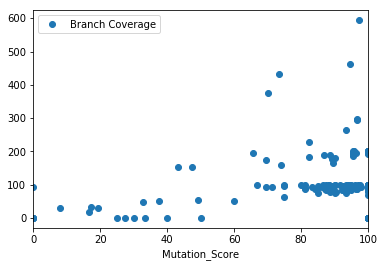

In [27]:
df.plot(x='Mutation_Score', y='Branch Coverage', style='o')


In [28]:
df[['Mutation_Score','Branch Coverage']].corr(method ='spearman')


,Mutation_Score,Branch Coverage
Mutation_Score,1.000000,0.054415
Branch Coverage,0.054415,1.000000
